# Alternative Representation of Atmospheric Response

Here we characterize the response with respect to the source position on the sky. This representation is useful for analyzing point sources observed with an imaging telescope, such as COSI. In this case, photons can be selected coming from the direction of the source, which is primarily limited by the angular resolution of the instrument.

Imports:

In [1]:
from cosi_atmosphere.response.ProcessSphericalSimsRep2 import ProcessSphericalRep2
import os

This tutorial requires two files, which contain the photon data for a simulation using 1e7 photons. The files are hosted on wasabi, and they can be downloaded using the two cells below. Note that these files are also used for spherical mass model tutuorial, and so you can use the same files if they have already been downloaded. 

In [ ]:
# File size: ~ 1GB
os.system("AWS_ACCESS_KEY_ID=GBAL6XATQZNRV3GFH9Y4 AWS_SECRET_ACCESS_KEY=GToOczY5hGX3sketNO2fUwiq4DJoewzIgvTCHoOv aws s3api get-object  --bucket cosi-pipeline-public --key COSI-Atmosphere/Spherical_Mass_Model_Tutorial/event_list_combined.dat --endpoint-url=https://s3.us-west-1.wasabisys.com event_list_combined.dat")

In [ ]:
# File size: ~ 1.2GB
os.system("AWS_ACCESS_KEY_ID=GBAL6XATQZNRV3GFH9Y4 AWS_SECRET_ACCESS_KEY=GToOczY5hGX3sketNO2fUwiq4DJoewzIgvTCHoOv aws s3api get-object  --bucket cosi-pipeline-public --key COSI-Atmosphere/Spherical_Mass_Model_Tutorial/all_thrown_events_combined.dat --endpoint-url=https://s3.us-west-1.wasabisys.com all_thrown_events_combined.dat")

We'll start by defining an instance of the class:

In [2]:
instance = ProcessSphericalRep2(33.6, all_events_file="all_thrown_events_combined.dat", measured_events_file="event_list_combined.dat")

/zfs/astrohe/ckarwin/My_Class_Library/COSI/cosi-atmosphere/cosi_atmosphere/response/ProcessSphericalSims.py:276: RuntimeWarning: invalid value encountered in sqrt
  sqrt = np.sqrt( dp**2 - norm(u,axis=1)**2 * (norm(o,axis=1)**2 - r**2) )



Finding intersection...
Number of photons with no solution: 499940


Total number of initial events: 10000000
Total number of unmeasured events: 1467541
Number of undefined incident angles: 468848



Next, let's bin the simulation data:

In [3]:
instance.bin_sim("atm_response_33p5km_rep2.hdf5")


Theta bins:
[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]

Delta theta bins:
[  0.           4.09090909   8.18181818  12.27272727  16.36363636
  20.45454545  24.54545455  28.63636364  32.72727273  36.81818182
  40.90909091  45.          49.09090909  53.18181818  57.27272727
  61.36363636  65.45454545  69.54545455  73.63636364  77.72727273
  81.81818182  85.90909091  90.          94.09090909  98.18181818
 102.27272727 106.36363636 110.45454545 114.54545455 118.63636364
 122.72727273 126.81818182 130.90909091 135.         139.09090909
 143.18181818 147.27272727 151.36363636 155.45454545 159.54545455
 163.63636364 167.72727273 171.81818182 175.90909091 180.        ]
Number of simulated events: 10000000
Number of events that reached watched volume: 8532459


Let's look at some plot of the response for an on-axis source at 1 MeV. The first plot shows the count distribution in terms of the angular distance from the source ($\Delta \theta_\mathrm{s}$). The second plot shows a 2D distribution of $\Delta \theta_\mathrm{s}$ and initial energies, for measured energies between 750 − 1155 keV.

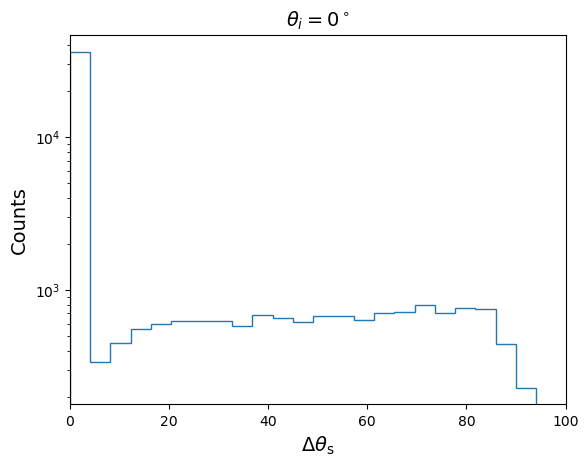

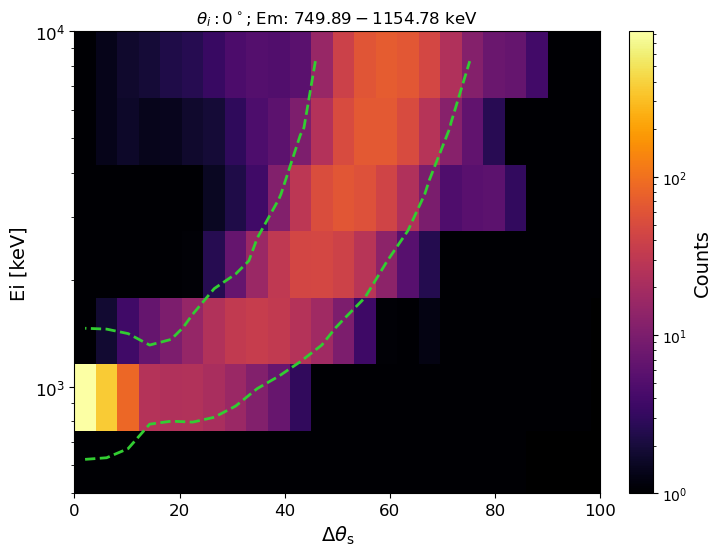

In [4]:
instance.make_scattering_plots(0, 1000, "on_axis_1MeV",  scale=65, sig_x=1, rsp_file="atm_response_33p5km_rep2.hdf5",dist_fig_kwargs={"xlim":(0,100)},rainbow_fig_kwargs={"xlim":(0,100), "ylim":(500,10000)})

Now let's look at the energy dispersion matrices and correction factors. We will start by including all angular distance from the source location:


Using dtheta max [deg]: 179.9
Corresponding to bin: 43

Total number of photons in response normalization:
9531147.0


Make sure you have appropriate statistics!
Check normalization matrix: self.starting_photons_rsp.contents.todense()

plotting transmitted edisp matrix...


/zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/histpy/histogram.py:1301: RuntimeWarning: divide by zero encountered in divide
  self._contents = operation(self.full_contents, other)
/zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/histpy/histogram.py:1301: RuntimeWarning: invalid value encountered in divide
  self._contents = operation(self.full_contents, other)


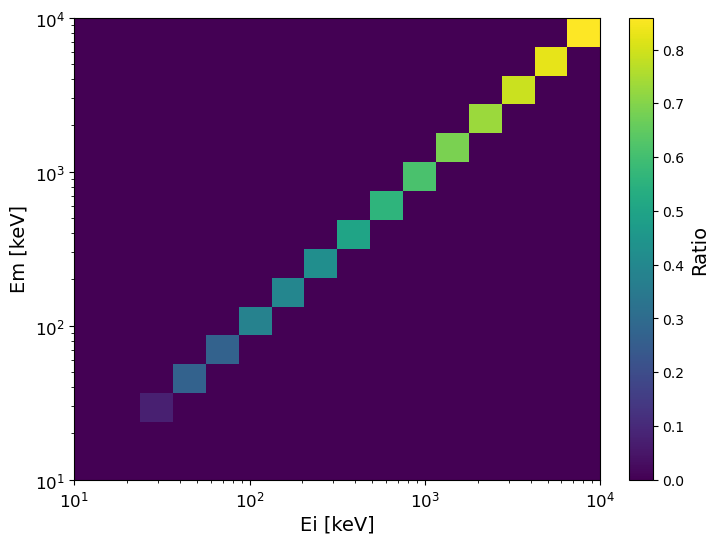

plotting scattered edisp matrix...


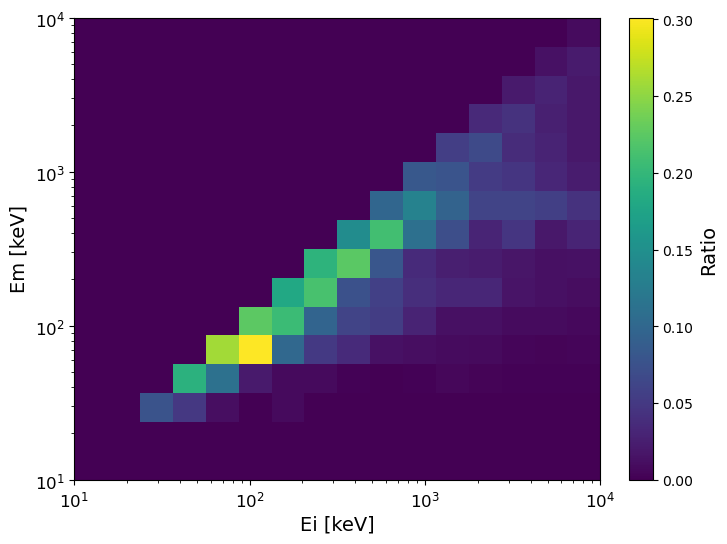

plotting total edisp matrix...


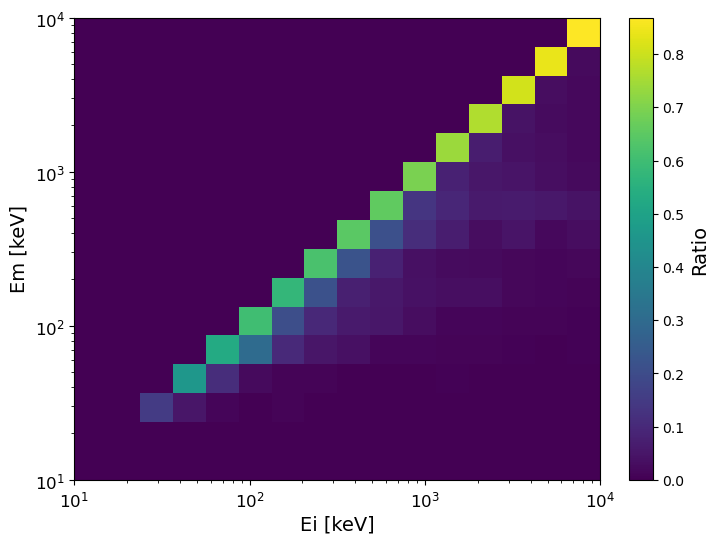

plotting transmission probability...


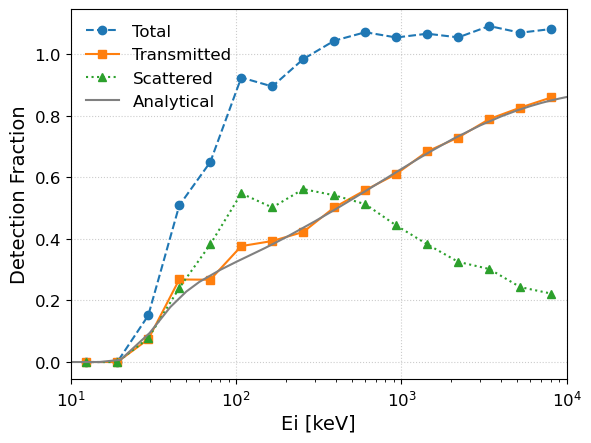

/zfs/astrohe/ckarwin/My_Class_Library/COSI/cosi-atmosphere/cosi_atmosphere/response/ProcessSims.py:867: RuntimeWarning: divide by zero encountered in divide
  c_ratio = c_total/c_beam
/zfs/astrohe/ckarwin/My_Class_Library/COSI/cosi-atmosphere/cosi_atmosphere/response/ProcessSims.py:867: RuntimeWarning: invalid value encountered in divide
  c_ratio = c_total/c_beam
/zfs/astrohe/ckarwin/My_Class_Library/COSI/cosi-atmosphere/cosi_atmosphere/response/ProcessSims.py:875: RuntimeWarning: invalid value encountered in divide
  s_frac = p_scattered / p_total


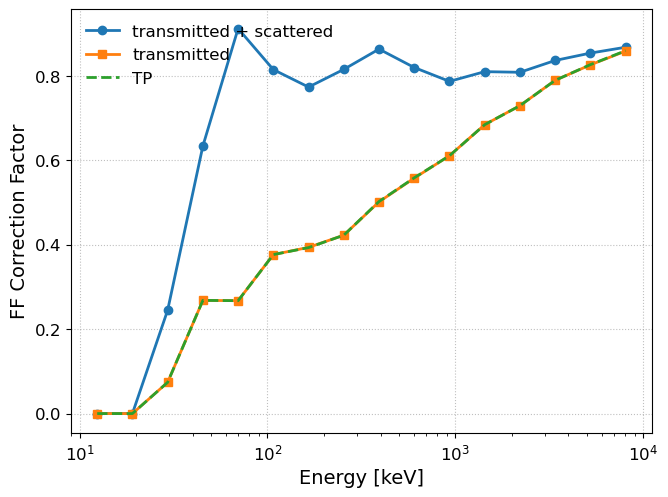

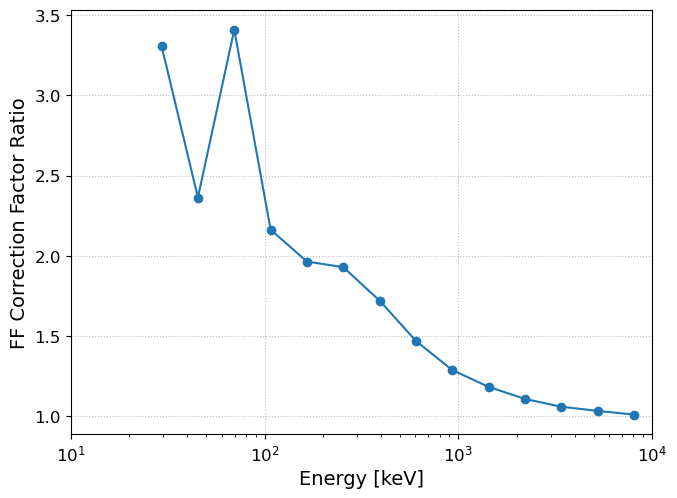

In [5]:
instance.get_total_edisp_matrix(0,179.9,rsp_file="atm_response_33p5km_rep2.hdf5",tp_file="TP_33p6km_on_axis_analytical.dat",make_plots=True)
model_flux=instance.PL_interp(2)
instance.ff_correction(model_flux,"on_axis_rsp2_all_dtheta")

The detection fraction and correction values are consistent with the results obtained with the first representation of the response (from the spherical mass model tutorial), as we would expect. Now, let's only include angular distances out to $15.3^\circ$, which is 3x the angular resolution of the COSI balloon instrument at 0.511 MeV. 


Using dtheta max [deg]: 15.3
Corresponding to bin: 3

Total number of photons in response normalization:
9531147.0


Make sure you have appropriate statistics!
Check normalization matrix: self.starting_photons_rsp.contents.todense()

plotting transmitted edisp matrix...


/zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/histpy/histogram.py:1301: RuntimeWarning: divide by zero encountered in divide
  self._contents = operation(self.full_contents, other)
/zfs/astrohe/Software/COSIMain_u2/lib/python3.9/site-packages/histpy/histogram.py:1301: RuntimeWarning: invalid value encountered in divide
  self._contents = operation(self.full_contents, other)


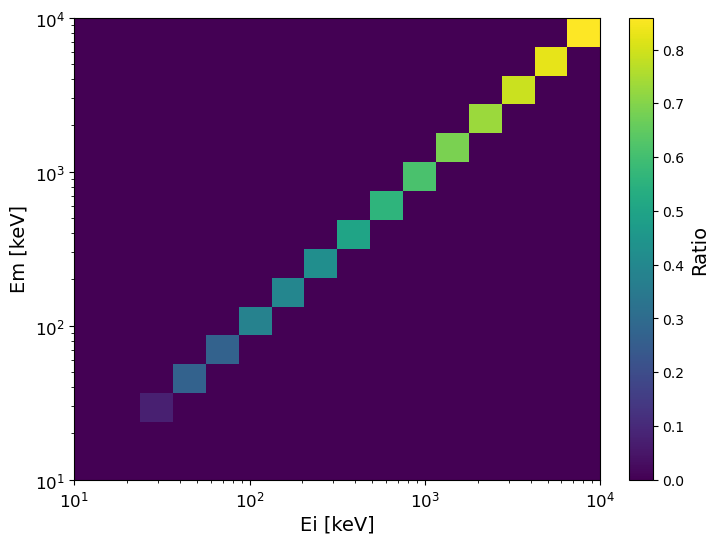

plotting scattered edisp matrix...


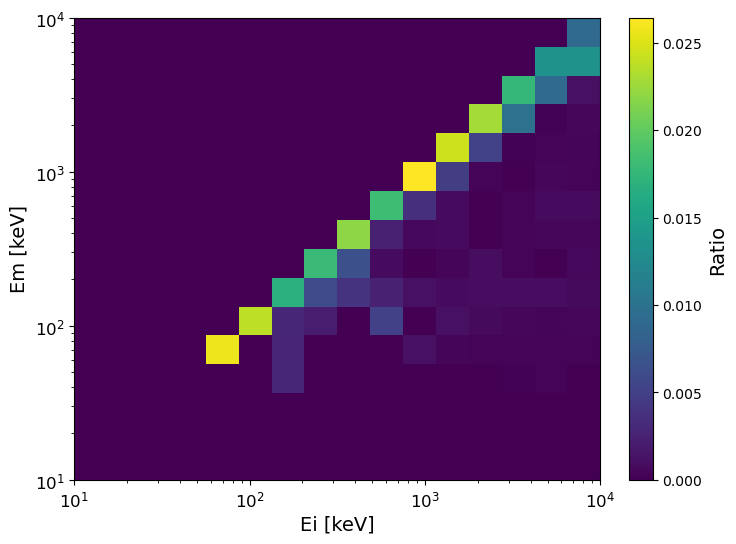

plotting total edisp matrix...


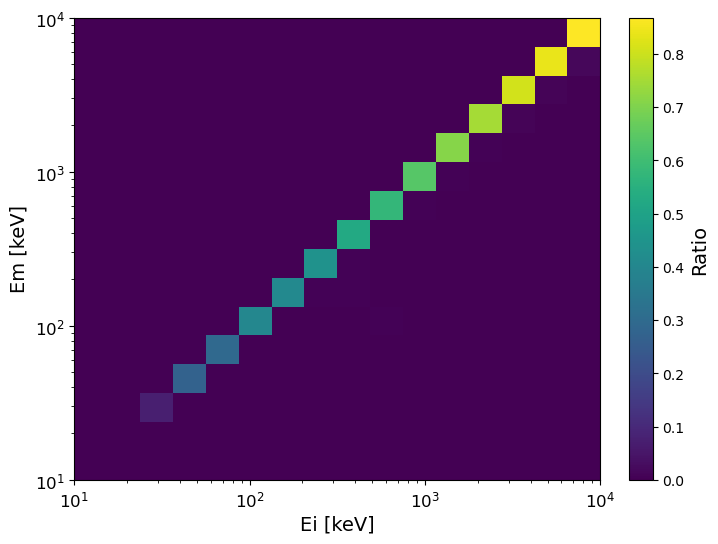

plotting transmission probability...


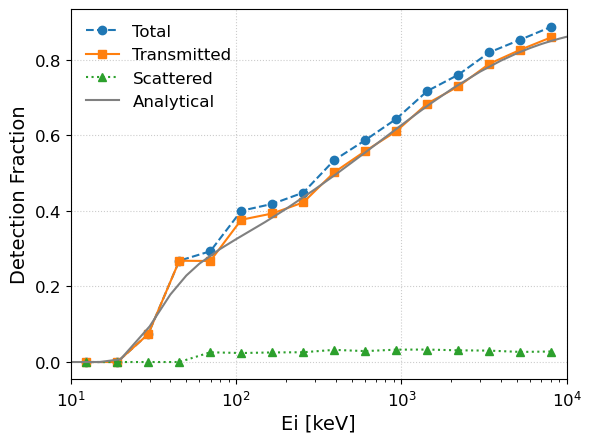

/zfs/astrohe/ckarwin/My_Class_Library/COSI/cosi-atmosphere/cosi_atmosphere/response/ProcessSims.py:867: RuntimeWarning: invalid value encountered in divide
  c_ratio = c_total/c_beam
/zfs/astrohe/ckarwin/My_Class_Library/COSI/cosi-atmosphere/cosi_atmosphere/response/ProcessSims.py:875: RuntimeWarning: invalid value encountered in divide
  s_frac = p_scattered / p_total


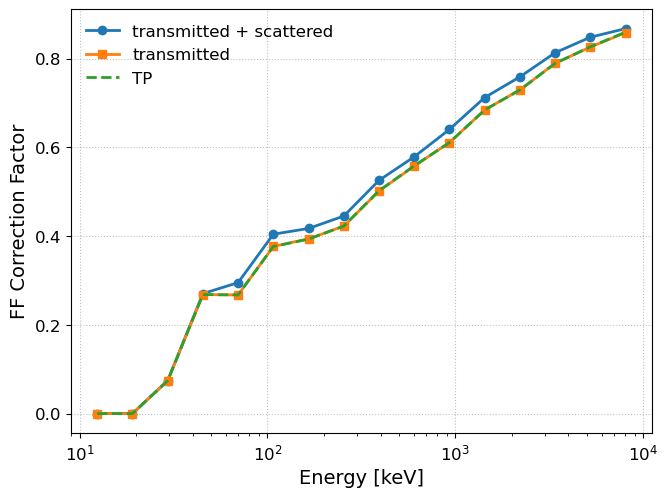

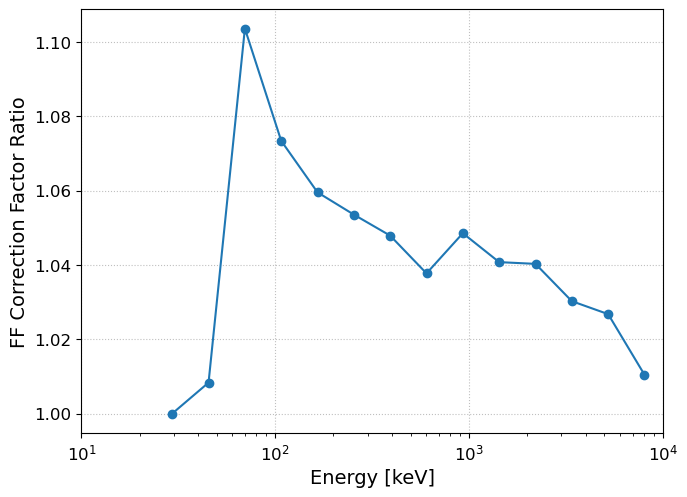

In [ ]:
instance.get_total_edisp_matrix(0,15.3,rsp_file="atm_response_33p5km_rep2.hdf5",tp_file="TP_33p6km_on_axis_analytical.dat",make_plots=True)
model_flux=instance.PL_interp(2)
instance.ff_correction(model_flux,"on_axis_rsp2_3xresolution_dtheta")

As can be seen, the ability to select photons within a limited angular distance of the source position substantially reduces the effects of scattering. 